In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score as ras

In [2]:
df = pd.read_csv('fraud_dataset_new.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28357 entries, 0 to 28356
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28357 non-null  int64  
 1   type            28357 non-null  object 
 2   amount          28357 non-null  float64
 3   nameOrig        28357 non-null  object 
 4   oldbalanceOrg   28357 non-null  float64
 5   newbalanceOrig  28357 non-null  float64
 6   nameDest        28357 non-null  object 
 7   oldbalanceDest  28357 non-null  float64
 8   newbalanceDest  28357 non-null  float64
 9   isFraud         28357 non-null  int64  
 10  isFlaggedFraud  28357 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 2.4+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

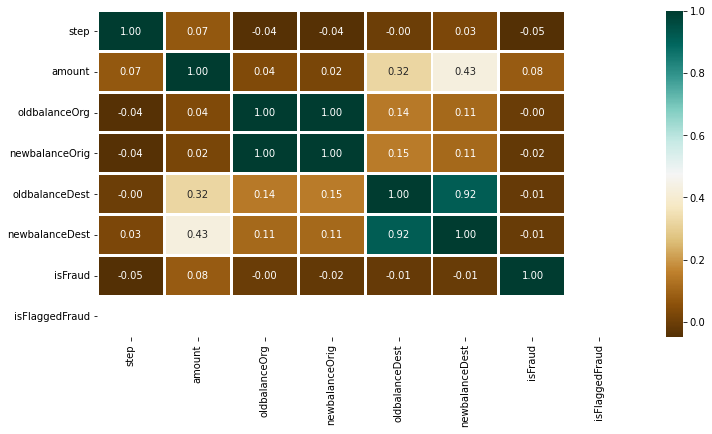

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [7]:
df['Type'] = df.type.map({'PAYMENT': 1, 'CASH_OUT': 2, 'DEBIT':3, 'TRANSFER':4})
df.drop(['type'], axis = 1, inplace = True)

In [8]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,2.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1.0


In [9]:
X = df.drop(['nameOrig','nameDest','isFraud'],axis=1)
Y = df['isFraud']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [78]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
scaler.fit_transform(X_train)
scaler.fit(X_test)

StandardScaler()

In [82]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [84]:
model.fit(X_train,Y_train)

XGBClassifier()

In [85]:
y_pred = model.predict(X_test)

In [86]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [87]:
print(ras(Y_test,y_pred))

0.7777777777777778


In [88]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [89]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [90]:
data = np.array([6,	178505.60	,0.00,	0.00	,397152.99	,575658.59	,0	,2.0]).reshape(1,-1)

In [91]:
data.shape

(1, 8)

In [92]:
scaler.transform(data)

array([[-0.22358601,  0.12937243, -0.35673993, -0.35760313, -0.17543291,
        -0.19551157,  0.        ,  0.33504509]])

In [93]:
model.predict(data)

array([0])